#  Python for Data Analysis and HPC
## PHIT P8010 Fundamentals of High Performance Computing
Daniel Bauer (bauer@cs.columbia.edu)

February 2, 2016

# Part 2: Data Analysis with Numpy, pandas, and Matplotlib 

## numpy

* Package for numeric computing in python
* provides an efficient data structure for numeric, n-dimensional arrays (ndarray)
* vector and matrix operations
* really fast, efficient implementation in C


In [1]:
[1,2,3] * 3 # multiplying a vector with a scalar? 

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [2]:
[1,2,3]+[4,5,6] #  summing two vectors?

[1, 2, 3, 4, 5, 6]

In [3]:
[1,2,3] * [4,5,6] # cross product? dot product?

TypeError: can't multiply sequence by non-int of type 'list'

In [4]:
u = [1,2,3]
v = [4,5,6]
sum([u[i] * v[i] for i in range(len(u))]) # this is ugly and slow

32

In [5]:
import numpy as np   # common convention
u = np.array([1,2,3])
v = np.array([4,5,6])
np.dot(u,v)

32

In [6]:
u + v

array([5, 7, 9])

In [7]:
type(u) 

numpy.ndarray

1-dimensional numpy arrays can be used as vectors, or represent a series of data

In [8]:
u + 4

array([5, 6, 7])

In [9]:
u * v

array([ 4, 10, 18])

In [10]:
u.max(), u.min(), u.mean(), u.std() #maximum, minimum, mean, standard deviation

(3, 1, 2.0, 0.81649658092772603)

**2-dimensional arrays**

In [57]:
u.shape

(3,)

different ways to create 2-dimensional arrays

In [61]:
a=np.array(range(5*5)) # create 1D array and reshape.
square = a.reshape(5,5)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [66]:
square

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [70]:
np.zeros((5,5))

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [71]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

**selecting data from 2D arrays**

In [82]:
square

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [81]:
for row in square:  # iterator over rows
    print(row, type(row), row.shape)

(array([0, 1, 2, 3, 4]), <type 'numpy.ndarray'>, (5,))
(array([5, 6, 7, 8, 9]), <type 'numpy.ndarray'>, (5,))
(array([10, 11, 12, 13, 14]), <type 'numpy.ndarray'>, (5,))
(array([15, 16, 17, 18, 19]), <type 'numpy.ndarray'>, (5,))
(array([20, 21, 22, 23, 24]), <type 'numpy.ndarray'>, (5,))


In [83]:
square[1:-1]  # slice rows

array([[ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [84]:
square[1:-1, 1:] #2D slice

array([[ 6,  7,  8,  9],
       [11, 12, 13, 14],
       [16, 17, 18, 19]])

In [86]:
square[:,1]  # slice to select a column vector

array([ 1,  6, 11, 16, 21])

In [87]:
square.flat # iterate by element

In [199]:
for e in square.flat: # iterate by element
    print(e)

AttributeError: 'numpy.ufunc' object has no attribute 'flat'

In [110]:
square

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [116]:
square[[1,3]]  #list index, select second and fourth row

array([[ 5,  6,  7,  8,  9],
       [15, 16, 17, 18, 19]])

In [117]:
square[:,[1,3]] # Second and fourth column

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

In [130]:
square % 2 == 0 # Create boolean array, pandas uses this a lot

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True]], dtype=bool)

**Joining arrays**

In [108]:
np.vstack((np.zeros((3,4)), np.ones((2,4))))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [109]:
np.hstack((np.zeros((3,4)), np.ones((3,2))))

array([[ 0.,  0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  1.]])

**Matrix operations**

In [119]:
square

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [120]:
square.transpose()

array([[ 0,  5, 10, 15, 20],
       [ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22],
       [ 3,  8, 13, 18, 23],
       [ 4,  9, 14, 19, 24]])

In [126]:
square * 3

array([[ 0,  3,  6,  9, 12],
       [15, 18, 21, 24, 27],
       [30, 33, 36, 39, 42],
       [45, 48, 51, 54, 57],
       [60, 63, 66, 69, 72]])

linear algebra functions

In [138]:
eigenvalues, eigenvectors = np.linalg.eig(square)
eigenvalues

array([  6.39116499e+01,  -3.91164992e+00,  -2.15440131e-15,
        -3.30489857e-16,   2.98459918e-15])

In [139]:
eigenvectors

array([[-0.0851802 , -0.67779864,  0.33749085, -0.00748633,  0.12057374],
       [-0.23825372, -0.36348873, -0.719832  ,  0.49922374, -0.32756598],
       [-0.39132723, -0.04917881,  0.53596467, -0.83164771, -0.15417009],
       [-0.54440074,  0.2651311 , -0.26239678,  0.1955695 ,  0.80874316],
       [-0.69747425,  0.57944101,  0.10877324,  0.1443408 , -0.44758083]])

## pandas
* numpy is powerful, but difficult to keep track of what arrays mean. 
* numpy arrays only contain data items of a single data type.
* pandas addresses this problem.
* pandas is a package for working with "panel data"
   *  Good way to explore tabular data quickly
   *  Especially good for exploring time series
* Two important data structures ```DataFrame``` and ```Series```

In [2]:
import pandas as pd #import the pandas package, using pd as an abbreviation

from pandas.io.parsers import read_csv
df = read_csv("files/WHO_first9cols.csv")
type(df)

pandas.core.frame.DataFrame

In [23]:
df #IPython uses rich display methods for data frame.

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total
0,Afghanistan,1,1,151,28.0,NaN,NaN,NaN,26088
1,Albania,2,2,27,98.7,6000,93,94,3172
2,Algeria,3,3,6,69.9,5940,94,96,33351
3,Andorra,4,2,NaN,NaN,NaN,83,83,74
4,Angola,5,3,146,67.4,3890,49,51,16557
5,Antigua and Barbuda,6,4,NaN,NaN,15130,NaN,NaN,84
6,Argentina,7,5,62,97.2,11670,98,99,39134
7,Armenia,8,2,30,99.4,4950,84,80,3010
8,Australia,9,6,16,NaN,33940,97,96,20530
9,Austria,10,2,14,NaN,36040,98,97,8327


In [14]:
len(df) # number of rows

202

In [15]:
df.columns

Index([u'Country', u'CountryID', u'Continent',
       u'Adolescent fertility rate (%)', u'Adult literacy rate (%)',
       u'Gross national income per capita (PPP international $)',
       u'Net primary school enrolment ratio female (%)',
       u'Net primary school enrolment ratio male (%)',
       u'Population (in thousands) total'],
      dtype='object')

In [16]:
df.dtypes # get types of each column

Country                                                    object
CountryID                                                   int64
Continent                                                   int64
Adolescent fertility rate (%)                             float64
Adult literacy rate (%)                                   float64
Gross national income per capita (PPP international $)    float64
Net primary school enrolment ratio female (%)             float64
Net primary school enrolment ratio male (%)               float64
Population (in thousands) total                           float64
dtype: object

In [17]:
df.index # allows to find entries quickly - here: just indexed in order

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            192, 193, 194, 195, 196, 197, 198, 199, 200, 201],
           dtype='int64', length=202)

In [39]:
df[:3] # selecting a set of rows using slicing

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total
0,Afghanistan,1,1,151,28.0,NaN,NaN,NaN,26088
1,Albania,2,2,27,98.7,6000,93,94,3172
2,Algeria,3,3,6,69.9,5940,94,96,33351


In [47]:
df.head()

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total
0,Afghanistan,1,1,151,28.0,NaN,NaN,NaN,26088
1,Albania,2,2,27,98.7,6000,93,94,3172
2,Algeria,3,3,6,69.9,5940,94,96,33351
3,Andorra,4,2,NaN,NaN,NaN,83,83,74
4,Angola,5,3,146,67.4,3890,49,51,16557


In [48]:
df.tail(3)

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total
199,Yemen,200,1,83,54.1,2090,65,85,21732
200,Zambia,201,3,161,68.0,1140,94,90,11696
201,Zimbabwe,202,3,101,89.5,NaN,88,87,13228


In [51]:
df.describe() # easy way to get descriptive statistics

,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total
count,202.000000,202.000000,177.000000,131.000000,178.000000,179.000000,179.000000,193.000000
mean,101.500000,3.579208,59.457627,78.871756,11250.112360,84.033520,85.698324,34098.046632
std,58.456537,1.808263,49.105286,20.415760,12586.753417,17.788047,15.451212,130495.731831
min,1.000000,1.000000,0.000000,23.600000,260.000000,6.000000,11.000000,2.000000
25%,51.250000,2.000000,19.000000,68.400000,2112.500000,79.000000,79.500000,1340.000000
50%,101.500000,3.000000,46.000000,86.500000,6175.000000,90.000000,90.000000,6762.000000
75%,151.750000,5.000000,91.000000,95.300000,14502.500000,96.000000,96.000000,21732.000000
max,202.000000,7.000000,199.000000,99.800000,60870.000000,100.000000,100.000000,1328474.000000


In [4]:
lit = "Adult literacy rate (%)"
df[df[lit]<30]

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total
0,Afghanistan,1,1,151,28.0,NaN,NaN,NaN,26088
27,Burkina Faso,28,3,131,23.6,1130,42,52,14359
34,Chad,35,3,193,25.7,1170,49,71,10468
71,Guinea,72,3,153,29.5,1130,66,77,9181
110,Mali,111,3,192,24.0,1000,54,67,11968
132,Niger,133,3,199,28.7,630,37,50,13737


In [76]:
df[lit]<30

0       True
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27      True
28     False
29     False
       ...  
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
189    False
190    False
191    False
192    False
193    False
194    False
195    False
196    False
197    False
198    False
199    False
200    False
201    False
Name: Adult literacy rate (%), dtype: bool

In [5]:
df[df[lit].isnull()==False]

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total
0,Afghanistan,1,1,151,28.0,NaN,NaN,NaN,26088
1,Albania,2,2,27,98.7,6000,93,94,3172
2,Algeria,3,3,6,69.9,5940,94,96,33351
4,Angola,5,3,146,67.4,3890,49,51,16557
6,Argentina,7,5,62,97.2,11670,98,99,39134
7,Armenia,8,2,30,99.4,4950,84,80,3010
10,Azerbaijan,11,2,31,98.8,5430,83,86,8406
12,Bahrain,13,1,14,86.5,34310,98,98,739
13,Bangladesh,14,7,135,47.5,1230,90,87,155991
15,Belarus,16,2,22,99.6,9700,88,90,9742


In [74]:
newdf = df.dropna()

**Series**

In [7]:
df[lit]

0      28.0
1      98.7
2      69.9
3       NaN
4      67.4
5       NaN
6      97.2
7      99.4
8       NaN
9       NaN
10     98.8
11      NaN
12     86.5
13     47.5
14      NaN
15     99.6
16      NaN
17     70.3
18     34.7
19      NaN
20      NaN
21     86.7
22     96.7
23     81.2
24     88.6
25     92.7
26     98.2
27     23.6
28     59.3
29     73.6
       ... 
172    79.6
173     NaN
174     NaN
175    80.8
176     NaN
177    99.5
178    69.4
179    92.6
180     NaN
181    53.2
182    98.9
183    98.5
184    74.3
185    87.4
186    98.8
187     NaN
188    68.1
189    99.4
190    88.5
191     NaN
192     NaN
193    96.8
194     NaN
195    75.5
196    93.0
197    90.3
198     NaN
199    54.1
200    68.0
201    89.5
Name: Adult literacy rate (%), dtype: float64

In [79]:
df[lit].min(), df[lit].max(), df[lit].df(), df[lit].median() 

(23.600000000000001, 99.799999999999997, 78.99249999999998, 85.75)

## Visualizing Data with Matplotlib

In [11]:
fert = "Adolescent fertility rate (%)"
lit = "Adult literacy rate (%)"
newdf = df.dropna(subset=[fert,lit])
newdf

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total
0,Afghanistan,1,1,151,28.0,NaN,NaN,NaN,26088
1,Albania,2,2,27,98.7,6000,93,94,3172
2,Algeria,3,3,6,69.9,5940,94,96,33351
4,Angola,5,3,146,67.4,3890,49,51,16557
6,Argentina,7,5,62,97.2,11670,98,99,39134
7,Armenia,8,2,30,99.4,4950,84,80,3010
10,Azerbaijan,11,2,31,98.8,5430,83,86,8406
12,Bahrain,13,1,14,86.5,34310,98,98,739
13,Bangladesh,14,7,135,47.5,1230,90,87,155991
15,Belarus,16,2,22,99.6,9700,88,90,9742


In [9]:
%matplotlib inline 
from matplotlib import pyplot as plt  #import matplotlib explicitly

(array([  6.,   4.,   1.,   8.,   6.,  10.,  12.,  14.,  25.,  43.]),
 array([ 23.6 ,  31.22,  38.84,  46.46,  54.08,  61.7 ,  69.32,  76.94,
         84.56,  92.18,  99.8 ]),
 <a list of 10 Patch objects>)

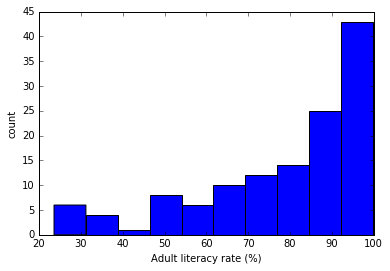

In [12]:
plt.xlabel(lit)
plt.ylabel("count")
plt.hist(newdf[lit],bins=10) # plot a histogram using 10 bins

(array([ 26.,  26.,  14.,  13.,  15.,  12.,   8.,   8.,   3.,   4.]),
 array([   3. ,   22.6,   42.2,   61.8,   81.4,  101. ,  120.6,  140.2,
         159.8,  179.4,  199. ]),
 <a list of 10 Patch objects>)

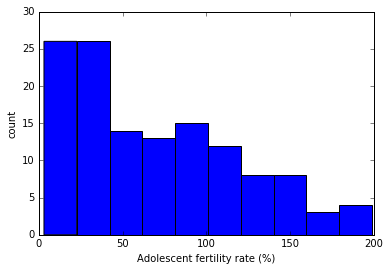

In [13]:
plt.xlabel(fert)
plt.ylabel("count")
plt.hist(newdf[fert],bins=10)

Looks like there might be a negative correlation here. Let's look at a scatter plot.

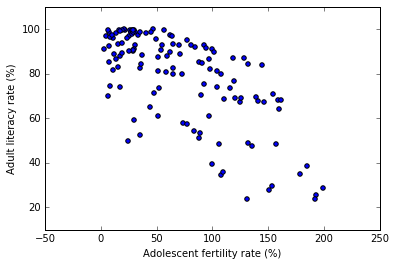

In [14]:
plt.ylabel(lit)
plt.xlabel(fert)
plt.scatter(newdf[fert],newdf[lit])

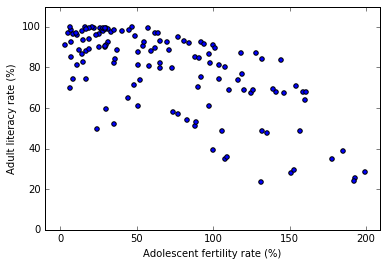

In [125]:
plt.axis([-10, newdf[fert].max()+10, 0, 110]) #adjust axis
plt.ylabel(lit)
plt.xlabel(fert)
plt.scatter(newdf[fert],newdf[lit])

Let's try linear regression.
```np.linalg.lstsq``` computes the least square solution for *m* to *A m = b*.

*b* is the literacy rate. To get a matrix *A* for the fertility rate we just stack the fertility vector with a vector of ones.

In [17]:
import numpy as np

In [18]:
A = np.vstack([newdf[fert], np.ones(newdf[fert].size)]).T

In [141]:
shape(A)

(129, 2)

In [19]:
m,c = np.linalg.lstsq(A,newdf[lit])[0]
m

-0.2767765613857886

In [20]:
c

98.144145477349326

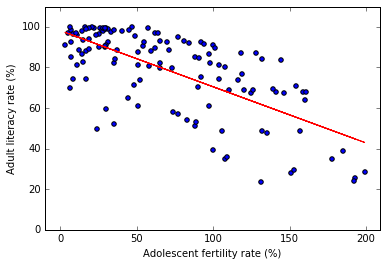

In [21]:
plt.axis([-10, newdf[fert].max()+10, 0, 110]) #adjust axis
plt.ylabel(lit)
plt.xlabel(fert)
plt.scatter(newdf[fert],newdf[lit])
plt.plot(newdf[fert], m*newdf[fert]+c, color="red")

Not bad, but maybe non-linear regression works better.

In [22]:
x = np.polyfit(newdf[fert],newdf[lit],2)  # fit a polynomial of degree 2 to the data

In [23]:
x

array([ -1.34006067e-03,  -4.66957713e-02,   9.20760007e+01])

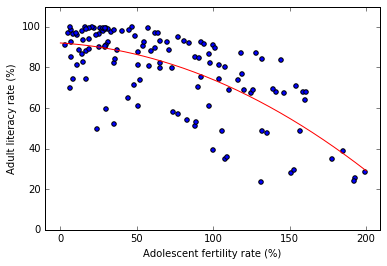

In [24]:
plt.axis([-10, newdf[fert].max()+10, 0, 110]) #adjust axis
plt.ylabel(lit)
plt.xlabel(fert)
plt.scatter(newdf[fert],newdf[lit])
seq = np.linspace(0,200,num=200)
plt.plot(seq, x[0]*seq**2 + x[1] * seq + x[2], color="red")

## Exercises 3

Load the data set files/fisher_iris.csv, which contains measurements of type, petal width, petal length, sepal width, and sepal length for a sample of 150 irises. The lengths are measured in millimeters. Type 0 is Setosa; type 1 is Verginica; and type 2 is Versicolor. [source](http://www.math.uah.edu/stat/data/Fisher.html)

* Create a scatter plot displaying petal width vs. petal length for each type of iris. 
* Plot histograms of the petal lengths for each type of iris. 
* Create a table describing the ratio between petal length and sepal length.
    * how would you determine if the ratios differ significantly between species?

## Other Packages for Data Analysis

* [scipy](http://scipy.org) - extension to numpy for scientific computing
* [scikit-learn](http://scikit-learn.org/stable/) - machine learning
* [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) - a different visualization toolkit
* [Continuum Anaconda](https://www.continuum.io/downloads) - python distribution that includes a lot of scientific computing tools and an easy-to-use IDE.

##Resources

Books:  
Ivan Idris (2015): Python Data Analysis, Packt Publishing  -- [ebook@CU library](https://clio.columbia.edu/catalog/11281868)  
  
Trent Hauk (2013): Instant Data Intensive Apps with pandas How-to, Packt Publishing   

Online:   
Numpy website (tutorials, docs) http://www.numpy.org/  
Matplotlib website (tutorials, docs) http://matplotlib.org/  
official pandas documentation http://pandas.pydata.org/pandas-docs/stable  